In [1]:
#link of the dataset
# https://www.kaggle.com/wordsforthewise/lending-club

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,average_precision_score,fbeta_score,roc_curve,auc,classification_report
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('lending_club_loan_two.csv')

In [4]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

## EDA 

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [7]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [8]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')#another CSV files which contain description of feature

In [9]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [10]:
def feat_info(col):
    print(data_info.loc[col]['Description'])

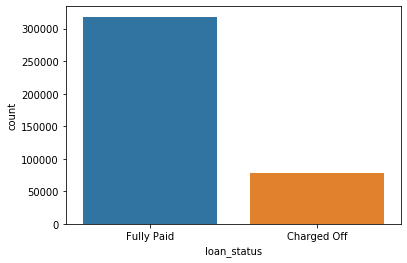

In [11]:
sns.countplot('loan_status',data=df)

In [12]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [13]:
100*len(df[df['loan_status']=='Charged Off'])/len(df) #unbalanced data

19.612908113021742

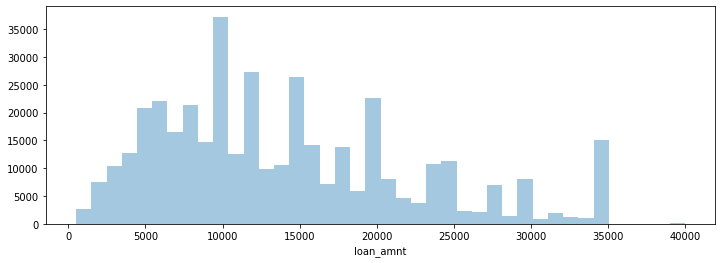

In [14]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

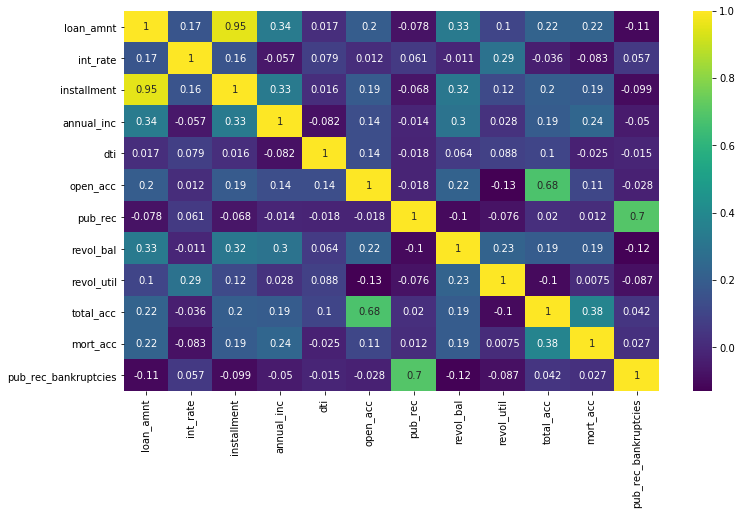

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

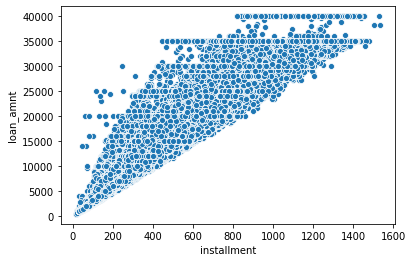

In [16]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)# as both have 0.95 correlation, lets explore those feature

In [17]:
feat_info('loan_amnt')
print('\n-------------------------------------------------------------------------------------')
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

-------------------------------------------------------------------------------------
The monthly payment owed by the borrower if the loan originates.


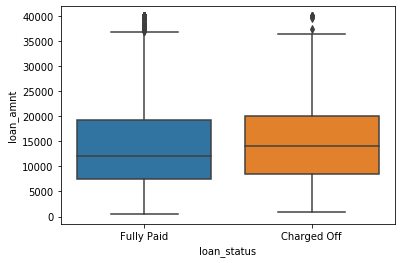

In [18]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [19]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [20]:
grade_order=sorted(df['grade'].unique())

In [21]:
subgrade_order=sorted(df['sub_grade'].unique())

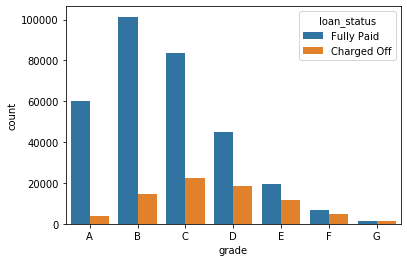

In [22]:
sns.countplot(x='grade',data=df,order = grade_order,hue='loan_status')

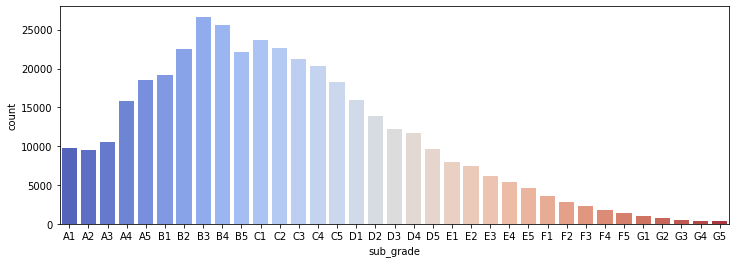

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

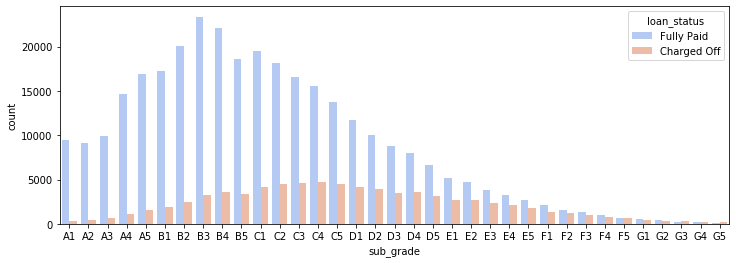

In [24]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,hue='loan_status',palette='coolwarm')

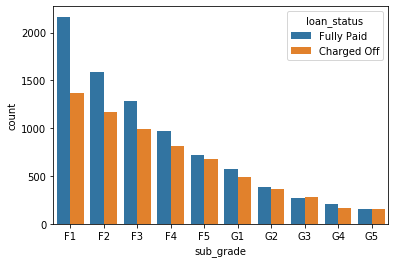

In [25]:
f_g=df[(df['grade']=='F')|(df['grade']=='G')]#from the above graph it is clear that F & G category has very less charged off 
subgrade_order=sorted(f_g['sub_grade'].unique())#category so we will plot those category separately
sns.countplot(x='sub_grade',order=subgrade_order,data=f_g,hue='loan_status')

In [26]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [27]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df['loan_repaid'].unique()

array([0, 1], dtype=int64)

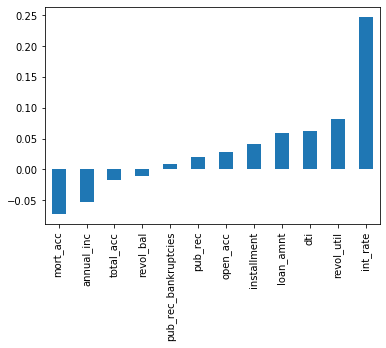

In [28]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## Data PreProcessing and Feature Engineering

In [29]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",1


In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [31]:
100*df.isnull().sum()/len(df)#percentage  of missing data of various category

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [32]:
feat_info('emp_title') #emp_title feature information

The job title supplied by the Borrower when applying for the loan.*


In [33]:
df['emp_title'].nunique()

173105

In [34]:
df['emp_title'].value_counts()

Teacher                                    4389
Manager                                    4250
Registered Nurse                           1856
RN                                         1846
Supervisor                                 1830
Sales                                      1638
Project Manager                            1505
Owner                                      1410
Driver                                     1339
Office Manager                             1218
manager                                    1145
Director                                   1089
General Manager                            1074
Engineer                                    995
teacher                                     962
driver                                      882
Vice President                              857
Operations Manager                          763
Administrative Assistant                    756
Accountant                                  748
President                               

In [35]:
df=df.drop('emp_title',axis=1)#so many job category , should drop the column

In [36]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [37]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [38]:
emp_length_order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

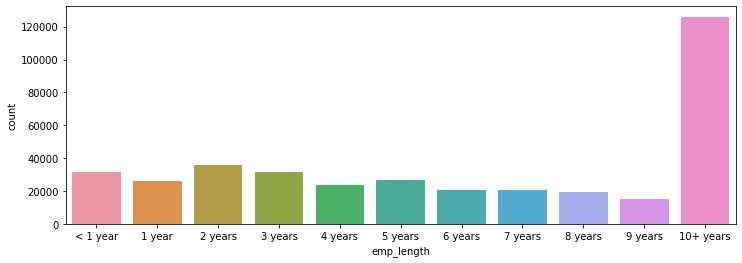

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

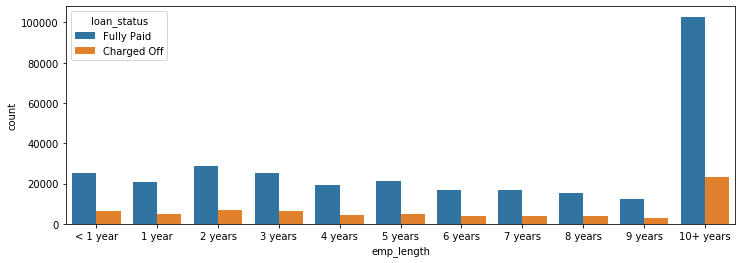

In [40]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [41]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length")['loan_status'].count()
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length")['loan_status'].count()
emp_ln=emp_co/emp_fp
emp_ln

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

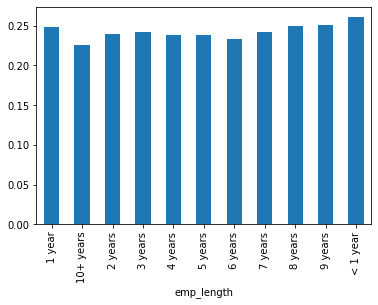

In [42]:
emp_ln.plot(kind='bar')#looks like employee length  has no effect on loan status so we will drop the loan status column

In [43]:
df=df.drop('emp_length',axis=1)

In [44]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [45]:
print('title:')
feat_info('title')
print('purpose:')
feat_info('purpose')

title:
The loan title provided by the borrower
purpose:
A category provided by the borrower for the loan request. 


In [46]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [47]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [48]:
df=df.drop('title',axis=1)#as title and purpose are same feature

In [49]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()#mort acc has correlation with total acc 

Correlation with the mort_acc column


int_rate               -0.082583
loan_repaid            -0.073111
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [50]:
total_acc_avg=df.groupby(by='total_acc').mean()['mort_acc']

In [51]:
def fill_mort(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc


In [52]:
df['mort_acc']=df.apply(lambda x:fill_mort(x['total_acc'],x['mort_acc']),axis=1 )

In [53]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [54]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [55]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [56]:
#pub_rec_bankruptcies and revol_util have less than 0.5 percent missing values so we can drop those rows
df=df.dropna()

In [57]:
df.isnull().sum() #no missing values

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [58]:
df.select_dtypes('object').columns #object type feature to make dummies

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [59]:
df['term'].value_counts()#only number is required  so can be made categorical or numerical

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [60]:
df['term']=df['term'].apply(lambda x: int(x[:3]))
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [62]:
df['home_ownership']=df['home_ownership'].replace({'NONE':'OTHER','ANY':'OTHER'})
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [63]:
df=df.drop('grade',axis=1)#  grade already under subgrade feature

In [64]:
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [65]:
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [67]:
df['zip_code']=df['address'].apply(lambda x: x[-5:])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [68]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address', 'zip_code'],
      dtype='object')

In [69]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [70]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
Oct-1999    2724
Nov-1999    2696
Sep-2000    2681
Oct-2002    2635
Aug-2002    2596
Sep-2001    2554
Aug-1999    2543
Sep-1999    2529
Sep-2002    2524
Dec-2000    2499
Sep-2003    2484
Dec-1999    2475
Oct-2003    2435
Nov-2001    2427
Dec-2001    2421
Jul-2001    2414
Jul-2000    2364
May-2001    2332
Jan-2001    2328
Dec-1998    2324
Mar-2001    2322
Jun-2001    2302
Oct-1998    2299
Nov-1998    2283
Sep-2004    2272
            ... 
Jan-1953       1
Aug-1959       1
Jun-1959       1
May-1962       1
Oct-1957       1
Feb-1961       1
Sep-1957       1
Jan-1944       1
Jul-1962       1
Mar-1960       1
Dec-1959       1
Aug-1958       1
Sep-1956       1
Sep-1961       1
Oct-1950       1
Jul-1961       1
Aug-1951       1
Jul-1958       1
Sep-1960       1
Jul-1959       1
May-1958       1
Nov-1959       1
Nov-1961       1
Nov-1953       1
Jan-1948       1
Feb-1962       1
Dec-1956       1
Nov-1957      

In [71]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda x:int(x[-4:]))#convert them into year

In [72]:
df.select_dtypes('object').columns#earliest cr line is no longer a categorical variable

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address', 'zip_code'],
      dtype='object')

In [73]:
df=df.drop('issue_d',axis=1)#This would be data leakage, we wouldn't know beforehand
#whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date

In [74]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [75]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [76]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [77]:
get_dummies=pd.get_dummies(df[['application_type','verification_status','initial_list_status','purpose','zip_code','home_ownership']],drop_first=True)

In [78]:
df=pd.concat([df,get_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'zip_code',
       'earliest_cr_year', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
     

In [79]:
df=df.drop(['initial_list_status','application_type','verification_status','home_ownership','purpose','earliest_cr_line','loan_status','address','zip_code'],axis=1)

In [80]:
df.shape

(395219, 79)

In [81]:
x=df.drop('loan_repaid',axis=1)
y=df['loan_repaid'].values

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)#train and test set

In [83]:
scaler=MinMaxScaler() 
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train.shape

(316175, 78)

## MODEL USING ANN

In [84]:
model = Sequential()

# 1st layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# 2nd layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# 3rd layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')

In [85]:
model.fit(x=x_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(x_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 12s 38us/sample - loss: 0.3016 - accuracy: 0.8773 - val_loss: 0.2642 - val_accuracy: 0.8889
Epoch 2/25
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2667 - accuracy: 0.8879 - val_loss: 0.2604 - val_accuracy: 0.8890
Epoch 3/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2639 - accuracy: 0.8880 - val_loss: 0.2610 - val_accuracy: 0.8889
Epoch 4/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2626 - accuracy: 0.8881 - val_loss: 0.2594 - val_accuracy: 0.8890
Epoch 5/25
316175/316175 [==============================] - 6s 18us/sample - loss: 0.2617 - accuracy: 0.8881 - val_loss: 0.2591 - val_accuracy: 0.8889
Epoch 6/25
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2613 - accuracy: 0.8879 - val_loss: 0.2594 - val_accuracy: 0.8887
Epoch 7/25
316175/316175 [================

In [86]:
losses = pd.DataFrame(model.history.history)

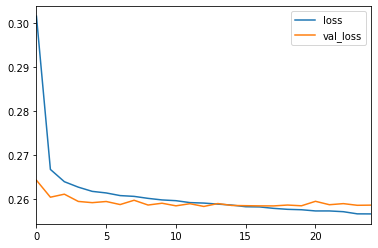

In [87]:
losses[['loss','val_loss']].plot()

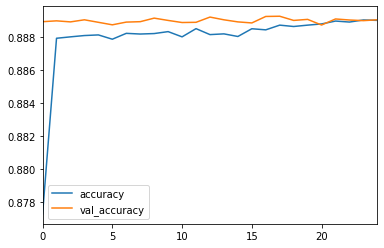

In [88]:
losses[['accuracy','val_accuracy']].plot()

In [89]:
predictions = model.predict_classes(x_test)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     63623
           1       0.96      0.45      0.61     15421

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

Confusion Matrix:

[[63367   256]
 [ 8516  6905]]


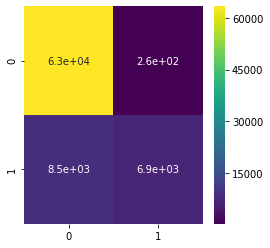

In [90]:
print(classification_report(y_test,predictions))
plt.figure(figsize=(4,4))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='viridis')

In [91]:
import random
random.seed(42)
random_ind = random.randint(0,len(df))
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new=scaler.fit_transform(new_customer.values.reshape(1,78))
print('predicted value:',model.predict_classes(new))
print('actual label:',y[random_ind])

predicted value: [[0]]
actual label: 0


## ANN WITH CLASS WEIGHT

In [92]:
normal, fraud = np.bincount(df['loan_repaid'])
total = normal + fraud
print('Examples:\n    Total: {}\n    Fraud: {} ({:.2f}% of total)\n'.format(total, fraud, 100 * fraud / total))

Examples:
    Total: 395219
    Fraud: 77523 (19.62% of total)



In [93]:
epochs=100
batch_size= 256

early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

In [94]:

def build_model():
    #1st layer
    model.add(Dense(78,  activation='relu'))
    model.add(Dropout(0.2))

    # 2nd layer
    model.add(Dense(39, activation='relu'))
    model.add(Dropout(0.2))

    # 3rd layer
    model.add(Dense(19, activation='relu'))
    model.add(Dropout(0.2))

    # output layer
    model.add(Dense(1,activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')
    return model

In [95]:
weight_for_normal = (1 / normal)*(total)/2.0 
weight_for_fraud = (1 / fraud)*(total)/2.0

class_weight = {0: weight_for_normal, 1: weight_for_fraud}

print('Weight for class 0(Normal Transactions): {:.2f}'.format(weight_for_normal))
print('Weight for class 1(Fraud Transactions): {:.2f}'.format(weight_for_fraud))
class_weight

Weight for class 0(Normal Transactions): 0.62
Weight for class 1(Fraud Transactions): 2.55


{0: 0.6220081461522965, 1: 2.5490435096680986}

In [96]:
model = build_model()
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,callbacks = [early_stopping],validation_data=(x_test, y_test),class_weight=class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 316175 samples, validate on 79044 samples
Epoch 1/100
316175/316175 [==============================] - 11s 34us/sample - loss: 0.3894 - accuracy: 0.7919 - val_loss: 0.3605 - val_accuracy: 0.8001
Epoch 2/100
316175/316175 [==============================] - 9s 27us/sample - loss: 0.3615 - accuracy: 0.7973 - val_loss: 0.3604 - val_accuracy: 0.7712
Epoch 3/100
316175/316175 [==============================] - 9s 28us/sample - loss: 0.3595 - accuracy: 0.7914 - val_loss: 0.3602 - val_accuracy: 0.7737
Epoch 4/100
316175/316175 [==============================] - 9s 28us/sample - loss: 0.3585 - accuracy: 0.7924 - val_loss: 0.3624 - val_accuracy: 0.8031
Epoch 5/100
316175/316175 [==============================] - 9s 27us/sample - loss: 0.3585 - accuracy: 0.7915 - val_loss: 0.3604 - val_accuracy: 0.7635
Epoch 6/100
316175/316175 [==============================] - 9s 27us/sample - loss: 0.3578 - accuracy: 0.7894 - val_loss: 0.3607 - val_acc

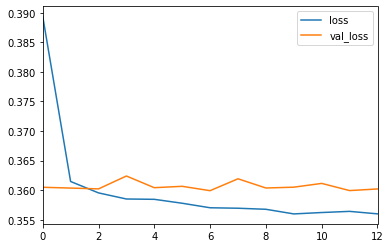

In [97]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

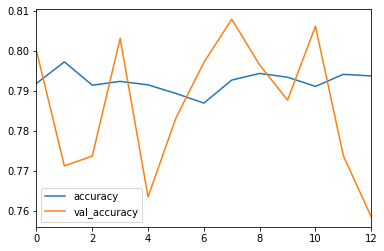

In [98]:
losses[['accuracy','val_accuracy']].plot()

In [99]:
predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))
print ("Final AUPRC on the testing data using ANN: {:.4f}".format(average_precision_score(y_test,predictions)))
print ("Final AUROC the testing data using ANN: {:.4f}".format(roc_auc_score(y_test, predictions)))
print ("Final F-score on the testing data using ANN: {:.4f}".format(fbeta_score(y_test,predictions, beta = 5)))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     63623
           1       0.51      0.78      0.61     15421

    accuracy                           0.81     79044
   macro avg       0.72      0.80      0.74     79044
weighted avg       0.85      0.81      0.82     79044

Final AUPRC on the testing data using ANN: 0.4376
Final AUROC the testing data using ANN: 0.7983
Final F-score on the testing data using ANN: 0.7662


Confusion Matrix:

[[51798 11825]
 [ 3356 12065]]


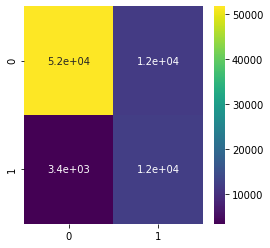

In [100]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,predictions))
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,predictions),cmap='viridis',annot=True)

## XGB WITH GRID SEARCH

In [101]:
sample_weight_pos=len(y_train)/y_train.sum()
sample_weight_pos

5.091220894657177

In [102]:
import xgboost as xgb
r1=xgb.XGBClassifier(n_estimators=10000,max_depth=6,learning_rate=0.01,sample_weight_pos=sample_weight_pos,
                     colsample_bytree=0.5,colsample_bylevel=0.5,gamma=1)
r1.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],eval_metric="auc",early_stopping_rounds=5)

[09:42:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.76393	validation_1-auc:0.76195
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.84353	validation_1-auc:0.84206
[2]	validation_0-auc:0.85958	validation_1-auc:0.85818
[3]	validation_0-auc:0.86267	validation_1-auc:0.86072
[4]	validation_0-auc:0.86188	validation_1-auc:0.85914
[5]	validation_0-auc:0.86151	validation_1-auc:0.85900
[6]	validation_0-auc:0.85814	validation_1-auc:0.85584
[7]	validation_0-auc:0.85715	validation_1-auc:0.85464
[8]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, sample_weight_pos=5.091220894657177,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [103]:
r1=xgb.XGBClassifier(sample_weight_pos=sample_weight_pos,colsample_bytree=0.5,colsample_bylevel=0.5)
params={"n_estimators":[200,300,400],"learning_rate":[0.05,0.1,0.2],"max_depth":[2,4,6]}
gs1=GridSearchCV(r1,param_grid=params,cv=3,scoring="roc_auc",verbose=10000)
gs1.fit(x_train,y_train)
gs1.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.05, max_depth=2, n_estimators=200 ...............
[09:42:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.05, max_depth=2, n_estimators=200, score=0.880, total=  26.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.4s remaining:    0.0s
[CV] learning_rate=0.05, max_depth=2, n_estimators=200 ...............
[09:43:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

 

[09:51:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.05, max_depth=4, n_estimators=300, score=0.903, total= 1.1min
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 10.0min remaining:    0.0s
[CV] learning_rate=0.05, max_depth=4, n_estimators=300 ...............
[09:52:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if

[CV]  learning_rate=0.05, max_depth=6, n_estimators=400, score=0.906, total= 2.4min
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 33.4min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[10:16:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.1, max_depth=2, n_estimators=200, score=0.895, total=  32.4s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed: 33.9min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=200 ................
[10:16:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } 

[10:27:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.1, max_depth=4, n_estimators=300, score=0.907, total= 1.4min
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed: 46.1min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=300 ................
[10:29:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if 

[CV]  learning_rate=0.1, max_depth=6, n_estimators=400, score=0.907, total= 2.2min
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 67.8min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=2, n_estimators=200 ................
[10:50:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.2, max_depth=2, n_estimators=200, score=0.903, total=  30.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed: 68.3min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=2, n_estimators=200 ................
[10:51:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } m

[11:01:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  learning_rate=0.2, max_depth=4, n_estimators=300, score=0.909, total= 1.2min
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed: 79.5min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=4, n_estimators=300 ................
[11:02:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if 

[CV]  learning_rate=0.2, max_depth=6, n_estimators=400, score=0.905, total= 2.3min
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 102.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 102.2min finished
[11:25:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 400}

In [104]:

r1=xgb.XGBClassifier(n_estimators=400,max_depth=4,learning_rate=0.2,sample_weight_pos=sample_weight_pos,
                     colsample_bytree=0.5,colsample_bylevel=0.5).fit(x_train,y_train)

[11:27:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sample_weight_pos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [105]:
confusion_matrix(y_train,r1.predict(x_train))#train data

array([[252312,   1761],
       [ 32086,  30016]], dtype=int64)

In [106]:
confusion_matrix(y_test,r1.predict(x_test))#test data

array([[63050,   573],
       [ 8111,  7310]], dtype=int64)

In [107]:
def roc_evaluation(r,x_train,x_test,y_train,y_test):
    plt.figure()
    fpr,tpr,_=roc_curve(y_train,r.predict_proba(x_train)[:,1])
    plt.plot(fpr,tpr,label="train_roc_curve")
    fpr,tpr,_=roc_curve(y_test,r.predict_proba(x_test)[:,1])
    plt.plot(fpr,tpr,label="test_roc_curve")
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC_CURVE")
    print("roc_auc score of train set is {}".format(roc_auc_score(y_train,r.predict_proba(x_train)[:,1])))
    print("roc_auc score of test set is {}".format(roc_auc_score(y_test,r.predict_proba(x_test)[:,1])))


roc_auc score of train set is 0.9190734581504749
roc_auc score of test set is 0.907215858507957


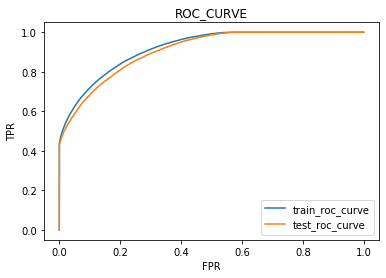

In [108]:
roc_evaluation(r1,x_train,x_test,y_train,y_test)

## Decision Tree , Random Forest and Gradient Boost with Grid search

In [109]:
def train_classifier(classifier, sample_size, x_train, y_train, x_test, y_test): 
    '''
    inputs:
       - classifier: classifier to be trained and predicted on
       - sample_size: sample size of training set
       - x_train=feature trainings set
       - y_train: label training set
       - X_test: features testing set
       - y_test: labael testing set
    '''
    
    results = {}
    
    # Fit the clasifier to the training data using slicing with 'sample_size'
   
    classifier.fit(x_train[:sample_size],y_train[:sample_size])
    
    
    #  predictions on the test set and training set,
  
    predictions_test = classifier.predict(x_test)
    predictions_train =classifier.predict(x_train)
            
    #accuracy on training samples
    results['auprc_train'] = average_precision_score(y_train, predictions_train)
        
    # accuracy on test set
    results['auprc_test'] = average_precision_score(y_test, predictions_test)
    
    #  F-score training set
    results['f_train'] = fbeta_score( y_train, predictions_train, beta=5)
        
    # F-score on test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=5)
    
    #  accuracy on training samples
    results['auroc_train'] = roc_auc_score(y_train, predictions_train)
        
    # accuracy on test set
    results['auroc_test'] = roc_auc_score(y_test, predictions_test)
       
    #PRINT THE RESULT
    print ("{} trained on {} samples.".format(classifier.__class__.__name__, sample_size))
    print(results)

In [110]:
clf_A = DecisionTreeClassifier(random_state=40)
clf_B = GradientBoostingClassifier()
clf_C=  RandomForestClassifier()  

# Collect results on the classifier
for clf in [clf_A, clf_B,clf_C]:
    samples = len(x_train)
        
    clf_name = clf.__class__.__name__
    
    for i, samples in enumerate([samples]):
        train_classifier(clf, samples, x_train, y_train, x_test, y_test)
        print("-------------------------------------------------------------------------------------------------------------------")

DecisionTreeClassifier trained on 316175 samples.
{'auprc_train': 1.0, 'auprc_test': 0.41770792101622894, 'f_train': 1.0, 'f_test': 0.5971976107516177, 'auroc_train': 1.0, 'auroc_test': 0.7438617527617379}
-------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier trained on 316175 samples.
{'auprc_train': 0.5426663060039074, 'auprc_test': 0.5420588285714277, 'f_train': 0.4457148499460092, 'f_test': 0.4467813959178679, 'auroc_train': 0.7175410742402675, 'auroc_test': 0.7179928886162001}
-------------------------------------------------------------------------------------------------------------------
RandomForestClassifier trained on 316175 samples.
{'auprc_train': 0.9999741205288549, 'auprc_test': 0.5412739932092744, 'f_train': 0.9999690335366798, 'f_test': 0.4617644587806686, 'auroc_train': 0.999983897459019, 'auroc_test': 0.723921739861331}
------------------------------------------------------------

Unoptimized model
------
AUPRC on testing data: 0.4169
AUROC on testing data: 0.7440
F-score on testing data: 0.5988

Optimized Model
------
Final AUPRC on the testing data: 0.5243
Final AUROC the testing data: 0.7275
Final F-score on the testing data: 0.4766
Area Under ROC Curve:  0.8895632431518781


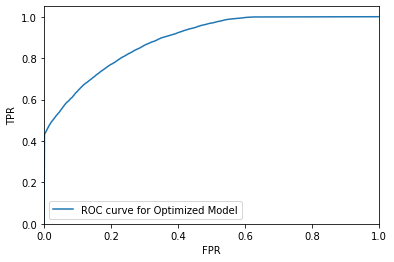

In [111]:
#Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

#parameters for tuning

parameters = {
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth':[8,15,None],
              'min_samples_split':[5,10,20],
              }

# grid search using roc_auc score
gs2 = GridSearchCV(clf, parameters, scoring="roc_auc")

# find the best parameter
grid_fit = gs2.fit(x_train, y_train)

# obtain the estimator
best_clf = grid_fit.best_estimator_

#predictions using the unoptimized model and optimized model
predictions = (clf.fit(x_train, y_train)).predict(x_test)
best_predictions = best_clf.predict(x_test)

# score before optimization 
print ("Unoptimized model\n------")
print ("AUPRC on testing data: {:.4f}".format(average_precision_score(y_test, predictions)))
print ("AUROC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 5)))

#score after optimization
print ("\nOptimized Model\n------")
print ("Final AUPRC on the testing data: {:.4f}".format(average_precision_score(y_test, best_predictions)))
print ("Final AUROC the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 5)))

probas_ = best_clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
area = auc(fpr, tpr)
print("Area Under ROC Curve: ",area)

#plot roc curve
plt.plot(fpr, tpr, label='ROC curve for Optimized Model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()

In [112]:
#Initialize the classifier
clf = GradientBoostingClassifier(random_state=42)

#parameters to tune
parameters = {
              'max_features': [0.5,0.75],
              'max_depth':[3,4,6],
              'learning_rate':[0.1,0.2,0.5],
              'n_estimators':[100,200,400],
              }

# grid search using roc score
gs2 = GridSearchCV(clf, parameters,cv=3,verbose=1000,scoring="roc_auc")

# fit grid search
grid_fit = gs2.fit(x_train, y_train)

# best estimator
best_clf = grid_fit.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.1, max_depth=3, max_features=0.5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, max_features=0.5, n_estimators=100, score=0.899, total= 2.4min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=3, max_features=0.5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, max_features=0.5, n_estimators=100, score=0.901, total= 2.4min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.8min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=3, max_features=0.5, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=3, max_features=0.5, n_estimators=100, score=0.900, total= 2.4min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.2min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=3, max_features=0.5, n_estimators=200 
[CV]  learning_rate=0.

[CV]  learning_rate=0.1, max_depth=4, max_features=0.75, n_estimators=200, score=0.907, total= 9.2min
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 319.5min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=4, max_features=0.75, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.75, n_estimators=400, score=0.907, total=20.5min
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 340.0min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=4, max_features=0.75, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.75, n_estimators=400, score=0.909, total=19.3min
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 359.3min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=4, max_features=0.75, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=4, max_features=0.75, n_estimators=400, score=0.908, total=21.3min
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 380.6min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=6, max_featu

[CV]  learning_rate=0.2, max_depth=3, max_features=0.75, n_estimators=100, score=0.905, total= 5.5min
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed: 734.0min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=3, max_features=0.75, n_estimators=200 
[CV]  learning_rate=0.2, max_depth=3, max_features=0.75, n_estimators=200, score=0.906, total=10.8min
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed: 744.8min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=3, max_features=0.75, n_estimators=200 
[CV]  learning_rate=0.2, max_depth=3, max_features=0.75, n_estimators=200, score=0.908, total=11.3min
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed: 756.1min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=3, max_features=0.75, n_estimators=200 
[CV]  learning_rate=0.2, max_depth=3, max_features=0.75, n_estimators=200, score=0.907, total= 8.3min
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed: 764.4min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=3, max_featu

[CV]  learning_rate=0.2, max_depth=6, max_features=0.5, n_estimators=400, score=0.905, total=28.4min
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed: 1194.3min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=6, max_features=0.5, n_estimators=400 
[CV]  learning_rate=0.2, max_depth=6, max_features=0.5, n_estimators=400, score=0.904, total=24.0min
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed: 1218.3min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=6, max_features=0.75, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=6, max_features=0.75, n_estimators=100, score=0.906, total= 9.2min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 1227.5min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=6, max_features=0.75, n_estimators=100 
[CV]  learning_rate=0.2, max_depth=6, max_features=0.75, n_estimators=100, score=0.908, total= 9.0min
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed: 1236.5min remaining:    0.0s
[CV] learning_rate=0.2, max_depth=6, max_feat

[CV]  learning_rate=0.5, max_depth=4, max_features=0.5, n_estimators=200, score=0.905, total= 9.9min
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed: 1624.2min remaining:    0.0s
[CV] learning_rate=0.5, max_depth=4, max_features=0.5, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=4, max_features=0.5, n_estimators=200, score=0.906, total= 9.6min
[Parallel(n_jobs=1)]: Done 131 out of 131 | elapsed: 1633.8min remaining:    0.0s
[CV] learning_rate=0.5, max_depth=4, max_features=0.5, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=4, max_features=0.5, n_estimators=200, score=0.905, total= 9.7min
[Parallel(n_jobs=1)]: Done 132 out of 132 | elapsed: 1643.5min remaining:    0.0s
[CV] learning_rate=0.5, max_depth=4, max_features=0.5, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, max_features=0.5, n_estimators=400, score=0.901, total=19.1min
[Parallel(n_jobs=1)]: Done 133 out of 133 | elapsed: 1662.6min remaining:    0.0s
[CV] learning_rate=0.5, max_depth=4, max_features

[CV]  learning_rate=0.5, max_depth=6, max_features=0.75, n_estimators=400, score=0.892, total=35.1min
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 2209.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 2209.1min finished


Unoptimized model
------
AUPRC on testing data: 0.5421
AUROC on testing data: 0.7180
F-score on testing data: 0.4468

Optimized Model
------
Final AUPRC on the testing data: 0.5430
Final AUROC the testing data: 0.7324
Final F-score on the testing data: 0.4825
Area Under ROC Curve:  0.9078508730527075
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 0.5, 'n_estimators': 400}


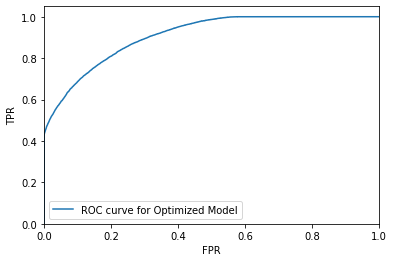

In [113]:
# predictions using the unoptimized model and optimized model
predictions = (clf.fit(x_train, y_train)).predict(x_test)
best_predictions = best_clf.predict(x_test)

# score before optimization
print ("Unoptimized model\n------")
print ("AUPRC on testing data: {:.4f}".format(average_precision_score(y_test, predictions)))
print ("AUROC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 5)))

#score after optimization
print ("\nOptimized Model\n------")
print ("Final AUPRC on the testing data: {:.4f}".format(average_precision_score(y_test, best_predictions)))
print ("Final AUROC the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 5)))

probas_ = best_clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
area = auc(fpr, tpr)
print("Area Under ROC Curve: ",area)
print(gs2.best_params_)

#plot roc curve
plt.plot(fpr, tpr, label='ROC curve for Optimized Model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()

In [114]:
clf = RandomForestClassifier(random_state=42)

# parameters to tune

parameters = {
              'max_features': [0.5,0.75],
              'max_depth':[8,12,15],
              "n_estimators":[200,300,400]
              }


# grid search using roc score
gs2 = GridSearchCV(clf, parameters,cv=3, scoring="roc_auc",verbose=1000)

# fit grid search
grid_fit = gs2.fit(x_train, y_train)

# best estimator
best_clf = grid_fit.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=8, max_features=0.5, n_estimators=200 .................
[CV]  max_depth=8, max_features=0.5, n_estimators=200, score=0.877, total= 9.2min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.2min remaining:    0.0s
[CV] max_depth=8, max_features=0.5, n_estimators=200 .................
[CV]  max_depth=8, max_features=0.5, n_estimators=200, score=0.881, total=10.9min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 20.1min remaining:    0.0s
[CV] max_depth=8, max_features=0.5, n_estimators=200 .................
[CV]  max_depth=8, max_features=0.5, n_estimators=200, score=0.878, total= 8.5min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 28.7min remaining:    0.0s
[CV] max_depth=8, max_features=0.5, n_estimators=300 .................
[CV]  max_depth=8, max_features=0.5, n_estimators=300, score=0.877, total=16.4min
[Paral

[CV]  max_depth=12, max_features=0.75, n_estimators=400, score=0.889, total=40.7min
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 775.7min remaining:    0.0s
[CV] max_depth=12, max_features=0.75, n_estimators=400 ...............
[CV]  max_depth=12, max_features=0.75, n_estimators=400, score=0.887, total=40.4min
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 816.1min remaining:    0.0s
[CV] max_depth=15, max_features=0.5, n_estimators=200 ................
[CV]  max_depth=15, max_features=0.5, n_estimators=200, score=0.898, total=16.8min
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 832.9min remaining:    0.0s
[CV] max_depth=15, max_features=0.5, n_estimators=200 ................
[CV]  max_depth=15, max_features=0.5, n_estimators=200, score=0.901, total=16.7min
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 849.7min remaining:    0.0s
[CV] max_depth=15, max_features=0.5, n_estimators=200 ................
[CV]  max_depth=15, max_features=0.5, n_estimators=200, sc

Unoptimized model
------
AUPRC on testing data: 0.5396
AUROC on testing data: 0.7234
F-score on testing data: 0.4610

Optimized Model
------
Final AUPRC on the testing data: 0.5421
Final AUROC the testing data: 0.7205
Final F-score on the testing data: 0.4529
Area Under ROC Curve:  0.89947870358416
{'max_depth': 15, 'max_features': 0.5, 'n_estimators': 200}


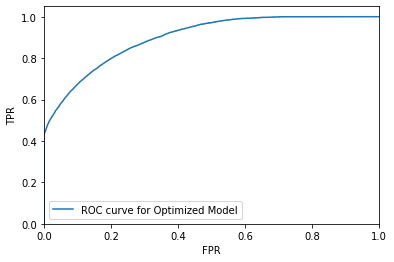

In [115]:
# predictions using the unoptimized model and optimized model
predictions = (clf.fit(x_train, y_train)).predict(x_test)
best_predictions = best_clf.predict(x_test)

# score before optimization
print ("Unoptimized model\n------")
print ("AUPRC on testing data: {:.4f}".format(average_precision_score(y_test, predictions)))
print ("AUROC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 5)))

#score after optimization
print ("\nOptimized Model\n------")
print ("Final AUPRC on the testing data: {:.4f}".format(average_precision_score(y_test, best_predictions)))
print ("Final AUROC the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 5)))

probas_ = best_clf.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
area = auc(fpr, tpr)
print("Area Under ROC Curve: ",area)
print(gs2.best_params_)

#plot roc curve
plt.plot(fpr, tpr, label='ROC curve for Optimized Model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()